In [2]:
import pandas as pd
import numpy as np          
import decimal
import datetime 
import matplotlib.pyplot as plt

# Loading data

In [3]:
df_stock_price= pd.read_csv('/Users/alvin/Desktop/desktop/NCKUxCUB/Thesis/Data/Stock data.csv')

In [4]:
df_inflation= pd.read_csv('/Users/alvin/Desktop/desktop/NCKUxCUB/Thesis/Data/inflation data.csv')

In [5]:
df_stock_price = df_stock_price[['Date', 'StockPrice', 'Trading days']]

In [6]:
df_inflation = df_inflation[['Date_inf', 'Inflation_variation']]

In [7]:
df_stock_price

,Date,StockPrice,Trading days
0,02/01/2009,313.34,1
1,05/01/2009,311.91,2
2,06/01/2009,314.04,3
3,07/01/2009,319.58,4
4,08/01/2009,314.15,5
...,...,...,...
3361,24/06/2022,"1,185.48",3362
3362,27/06/2022,"1,202.82",3363
3363,28/06/2022,"1,218.10",3364
3364,29/06/2022,"1,218.09",3365


In [8]:
print(df_stock_price.dtypes)

Date            object
StockPrice      object
Trading days     int64
dtype: object


In [9]:
df_inflation

,Date_inf,Inflation_variation
0,01/01/2009,0.32
1,01/02/2009,1.17
2,01/03/2009,-0.17
3,01/04/2009,0.35
4,01/05/2009,0.44
...,...,...
157,01/02/2022,1.00
158,01/03/2022,0.70
159,01/04/2022,0.18
160,01/05/2022,0.38


In [10]:
print(df_inflation.dtypes)

Date_inf                object
Inflation_variation    float64
dtype: object


# Processing Data

In [11]:
#change format of date to '%d/%m/%Y'
df_stock_price["Date"]=pd.to_datetime(df_stock_price["Date"].astype(str), format='%d/%m/%Y')


In [12]:
#change format of date to '%d/%m/%Y'
df_inflation["Date_inf"]=pd.to_datetime(df_inflation["Date_inf"].astype(str), format='%d/%m/%Y')

In [13]:
#change data type from string to dateitme
df_stock_price["Date"] = pd.to_datetime(df_stock_price["Date"])

In [14]:
#change data type from string to datetime
df_inflation["Date_inf"] = pd.to_datetime(df_inflation["Date_inf"])

In [15]:
#change data type from string to datetime
df_stock_price["Date"] = df_stock_price["Date"].astype('datetime64[ns]')

In [16]:
df_inflation["Date_inf"] = df_inflation["Date_inf"].astype('datetime64[ns]')

In [17]:
#change '' in column "StockPrice" to 0.00
df_stock_price['StockPrice']=df_stock_price['StockPrice'].str.replace(',','').replace('','0.00')

In [18]:
df_stock_price['StockPrice'] = df_stock_price['StockPrice'].astype(float)

In [19]:
print(df_stock_price.dtypes)

Date            datetime64[ns]
StockPrice             float64
Trading days             int64
dtype: object


In [20]:
df_stock_price

,Date,StockPrice,Trading days
0,2009-01-02,313.34,1
1,2009-01-05,311.91,2
2,2009-01-06,314.04,3
3,2009-01-07,319.58,4
4,2009-01-08,314.15,5
...,...,...,...
3361,2022-06-24,1185.48,3362
3362,2022-06-27,1202.82,3363
3363,2022-06-28,1218.10,3364
3364,2022-06-29,1218.09,3365


# Use stock price to calculate RSI 

In [21]:
import ta


# calculate the RSI using ta library
df_stock_price['RSI_sp'] = ta.momentum.RSIIndicator(df_stock_price['StockPrice'], window=14).rsi()

# print the RSI values
print(df_stock_price['RSI_sp'])

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3361    35.370958
3362    40.420868
3363    44.533727
3364    44.531560
3365    40.214401
Name: RSI_sp, Length: 3366, dtype: float64


In [22]:
df_stock_price

,Date,StockPrice,Trading days,RSI_sp
0,2009-01-02,313.34,1,NaN
1,2009-01-05,311.91,2,NaN
2,2009-01-06,314.04,3,NaN
3,2009-01-07,319.58,4,NaN
4,2009-01-08,314.15,5,NaN
...,...,...,...,...
3361,2022-06-24,1185.48,3362,35.370958
3362,2022-06-27,1202.82,3363,40.420868
3363,2022-06-28,1218.10,3364,44.533727
3364,2022-06-29,1218.09,3365,44.531560


# Combine stock price and RSI in one line chart

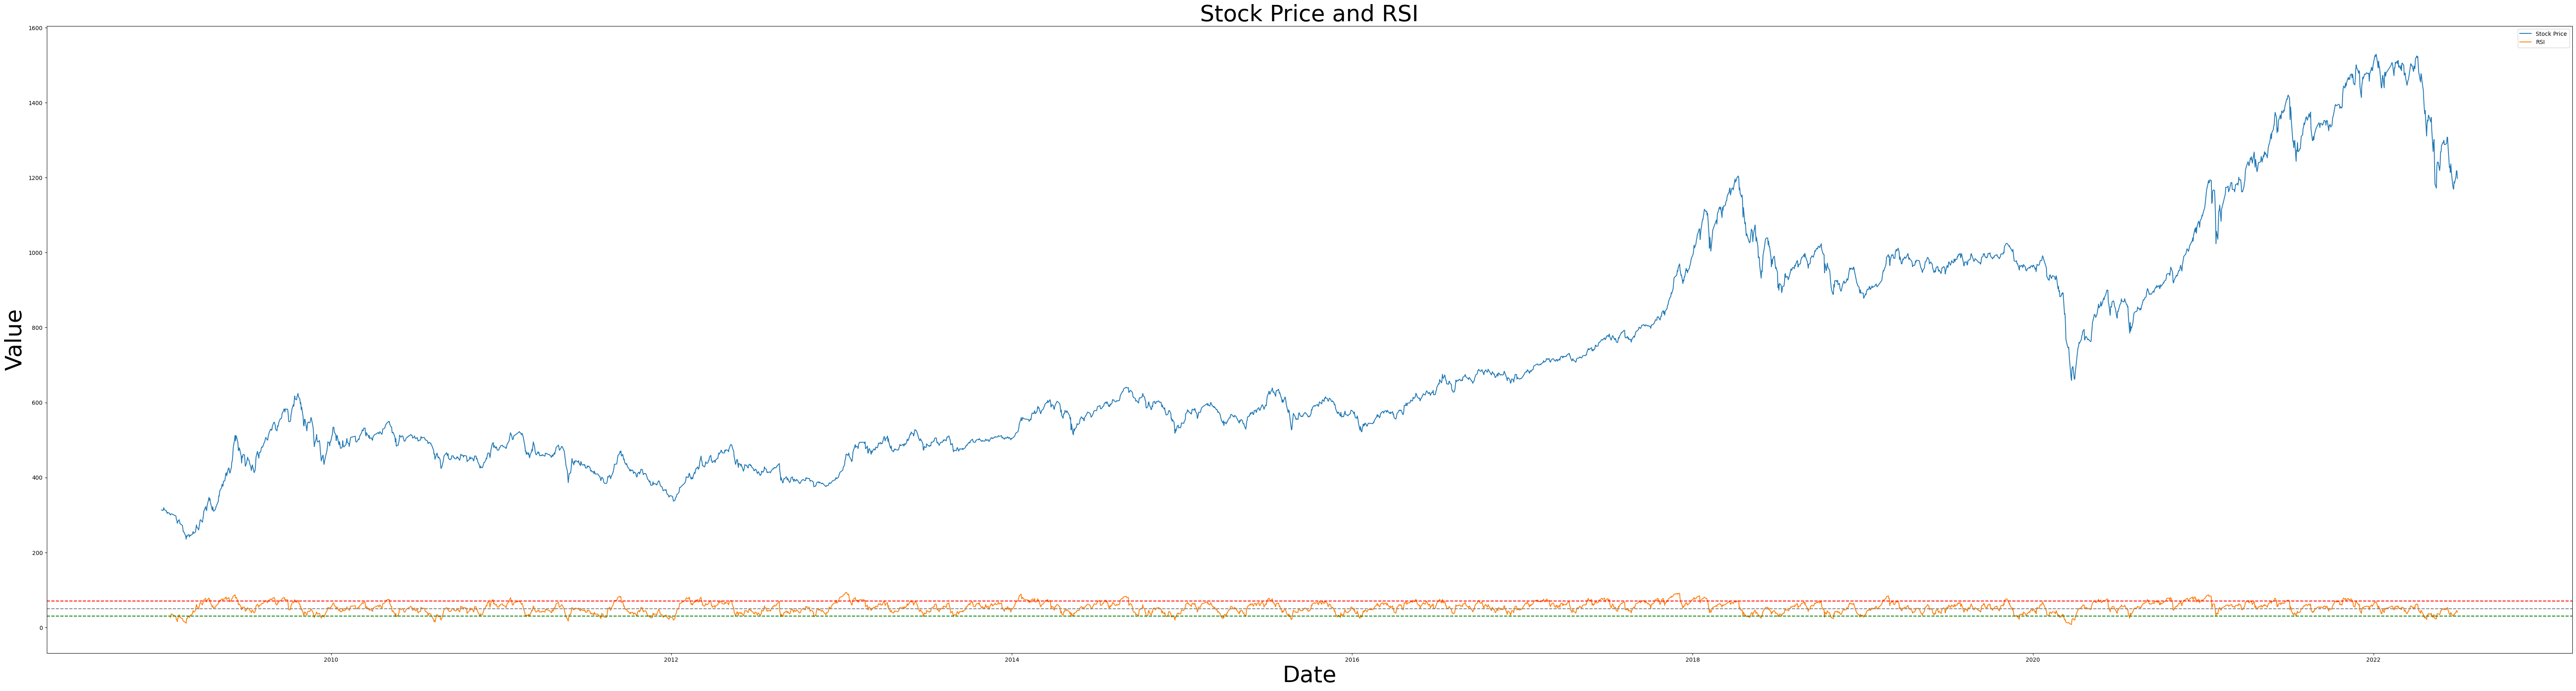

In [23]:

# Create a new figure
fig, ax = plt.subplots(figsize=(80, 20))

# Plot the first line chart
ax.plot(df_stock_price['Date'], df_stock_price['StockPrice'], label='Stock Price')

# Plot the second line chart

ax.plot(df_stock_price['Date'], df_stock_price['RSI_sp'], label='RSI')

# Set the title and labels for the chart
plt.title('Stock Price and RSI',fontsize = 40)
plt.xlabel('Date',fontsize = 40)
plt.ylabel('Value',fontsize = 40)
plt.axhline(y=30, color='g', linestyle='--')
plt.axhline(y=50, color='gray', linestyle='--')
plt.axhline(y=70, color='r', linestyle='--')
# Show the legend and plot the chart
plt.legend()
plt.show()


# create a Stock price line chart

Text(0.5, 1.0, 'stock_price')

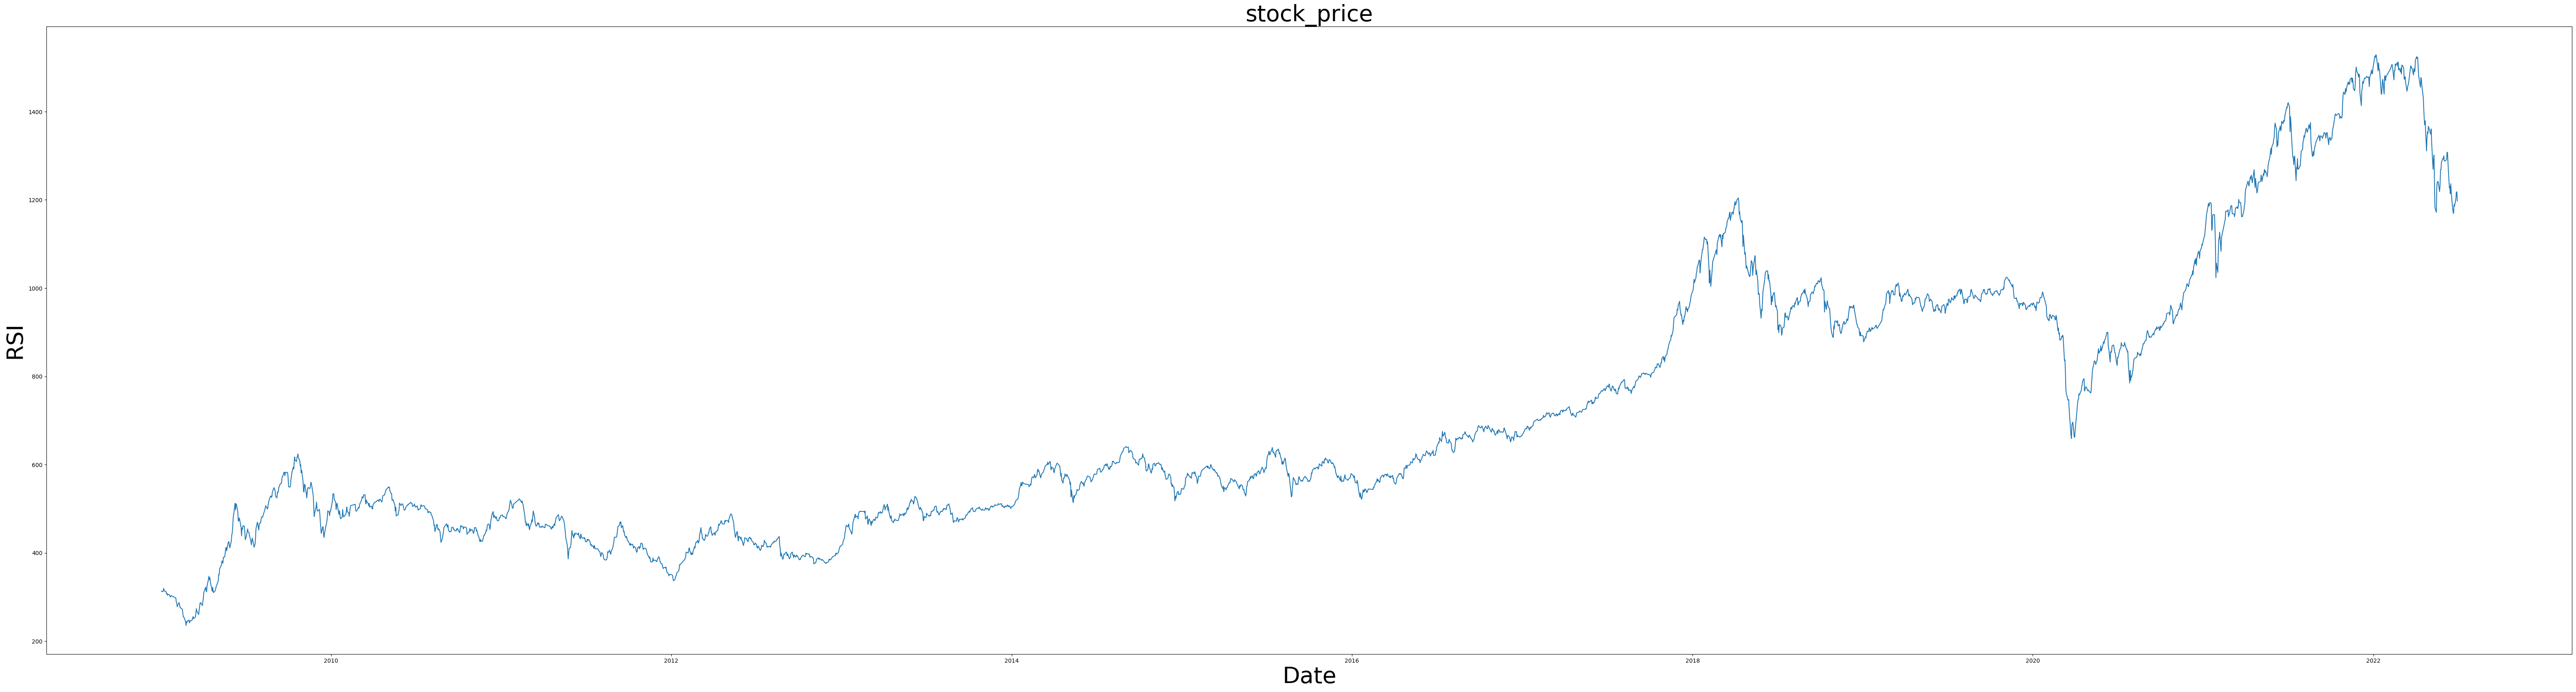

In [24]:

fig = plt.figure(figsize=(80, 20))
plt.plot(df_stock_price['Date'], df_stock_price['StockPrice'])
# add labels and a title
plt.xlabel('Date',  fontsize=40)
plt.ylabel('RSI',  fontsize=40)
plt.title('stock_price',  fontsize=40)

# Create a RSI_using_stock_price line chart 

Text(0.5, 1.0, 'RSI_using_stock_price')

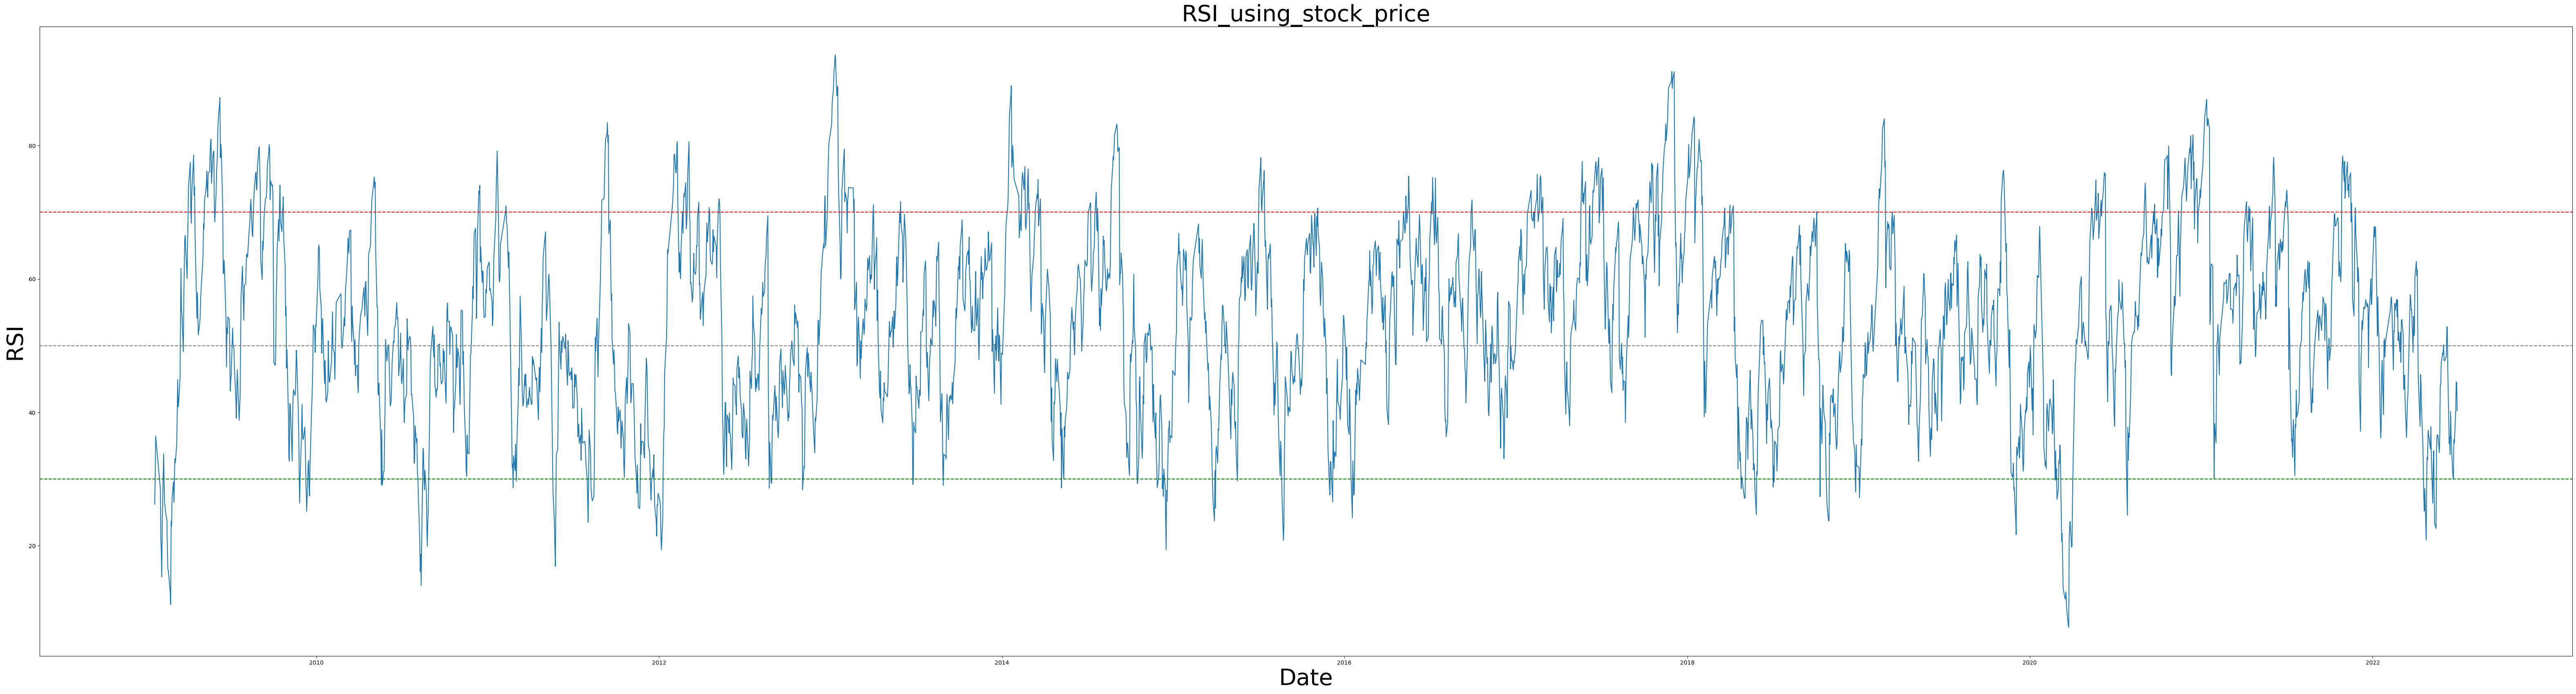

In [25]:

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(80, 20))
plt.plot(df_stock_price['Date'], df_stock_price['RSI_sp'])
# add labels and a title
plt.axhline(y=30, color='g', linestyle='--')
plt.axhline(y=50, color='gray', linestyle='--')
plt.axhline(y=70, color='r', linestyle='--')
plt.xlabel('Date',  fontsize=40)
plt.ylabel('RSI',  fontsize=40)
plt.title('RSI_using_stock_price',  fontsize=40)

In [26]:
print(df_inflation.dtypes)

Date_inf               datetime64[ns]
Inflation_variation           float64
dtype: object


# Use inflation to calculate RSI

In [27]:
df_inflation

,Date_inf,Inflation_variation
0,2009-01-01,0.32
1,2009-02-01,1.17
2,2009-03-01,-0.17
3,2009-04-01,0.35
4,2009-05-01,0.44
...,...,...
157,2022-02-01,1.00
158,2022-03-01,0.70
159,2022-04-01,0.18
160,2022-05-01,0.38


# RSI is calculated by Inflation

In [28]:

import ta
# calculate the RSI using ta library
df_inflation['RSI_in'] = ta.momentum.RSIIndicator(df_inflation['Inflation_variation'], window=14).rsi()

# print the RSI values
print(df_inflation['RSI_in'])

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
157    56.142488
158    53.671725
159    49.597318
160    51.133839
161    53.500051
Name: RSI_in, Length: 162, dtype: float64


In [29]:
df_inflation

,Date_inf,Inflation_variation,RSI_in
0,2009-01-01,0.32,NaN
1,2009-02-01,1.17,NaN
2,2009-03-01,-0.17,NaN
3,2009-04-01,0.35,NaN
4,2009-05-01,0.44,NaN
...,...,...,...
157,2022-02-01,1.00,56.142488
158,2022-03-01,0.70,53.671725
159,2022-04-01,0.18,49.597318
160,2022-05-01,0.38,51.133839


# create a RSI_using_inflation line chart

Text(0.5, 1.0, 'RSI_using_inflation')

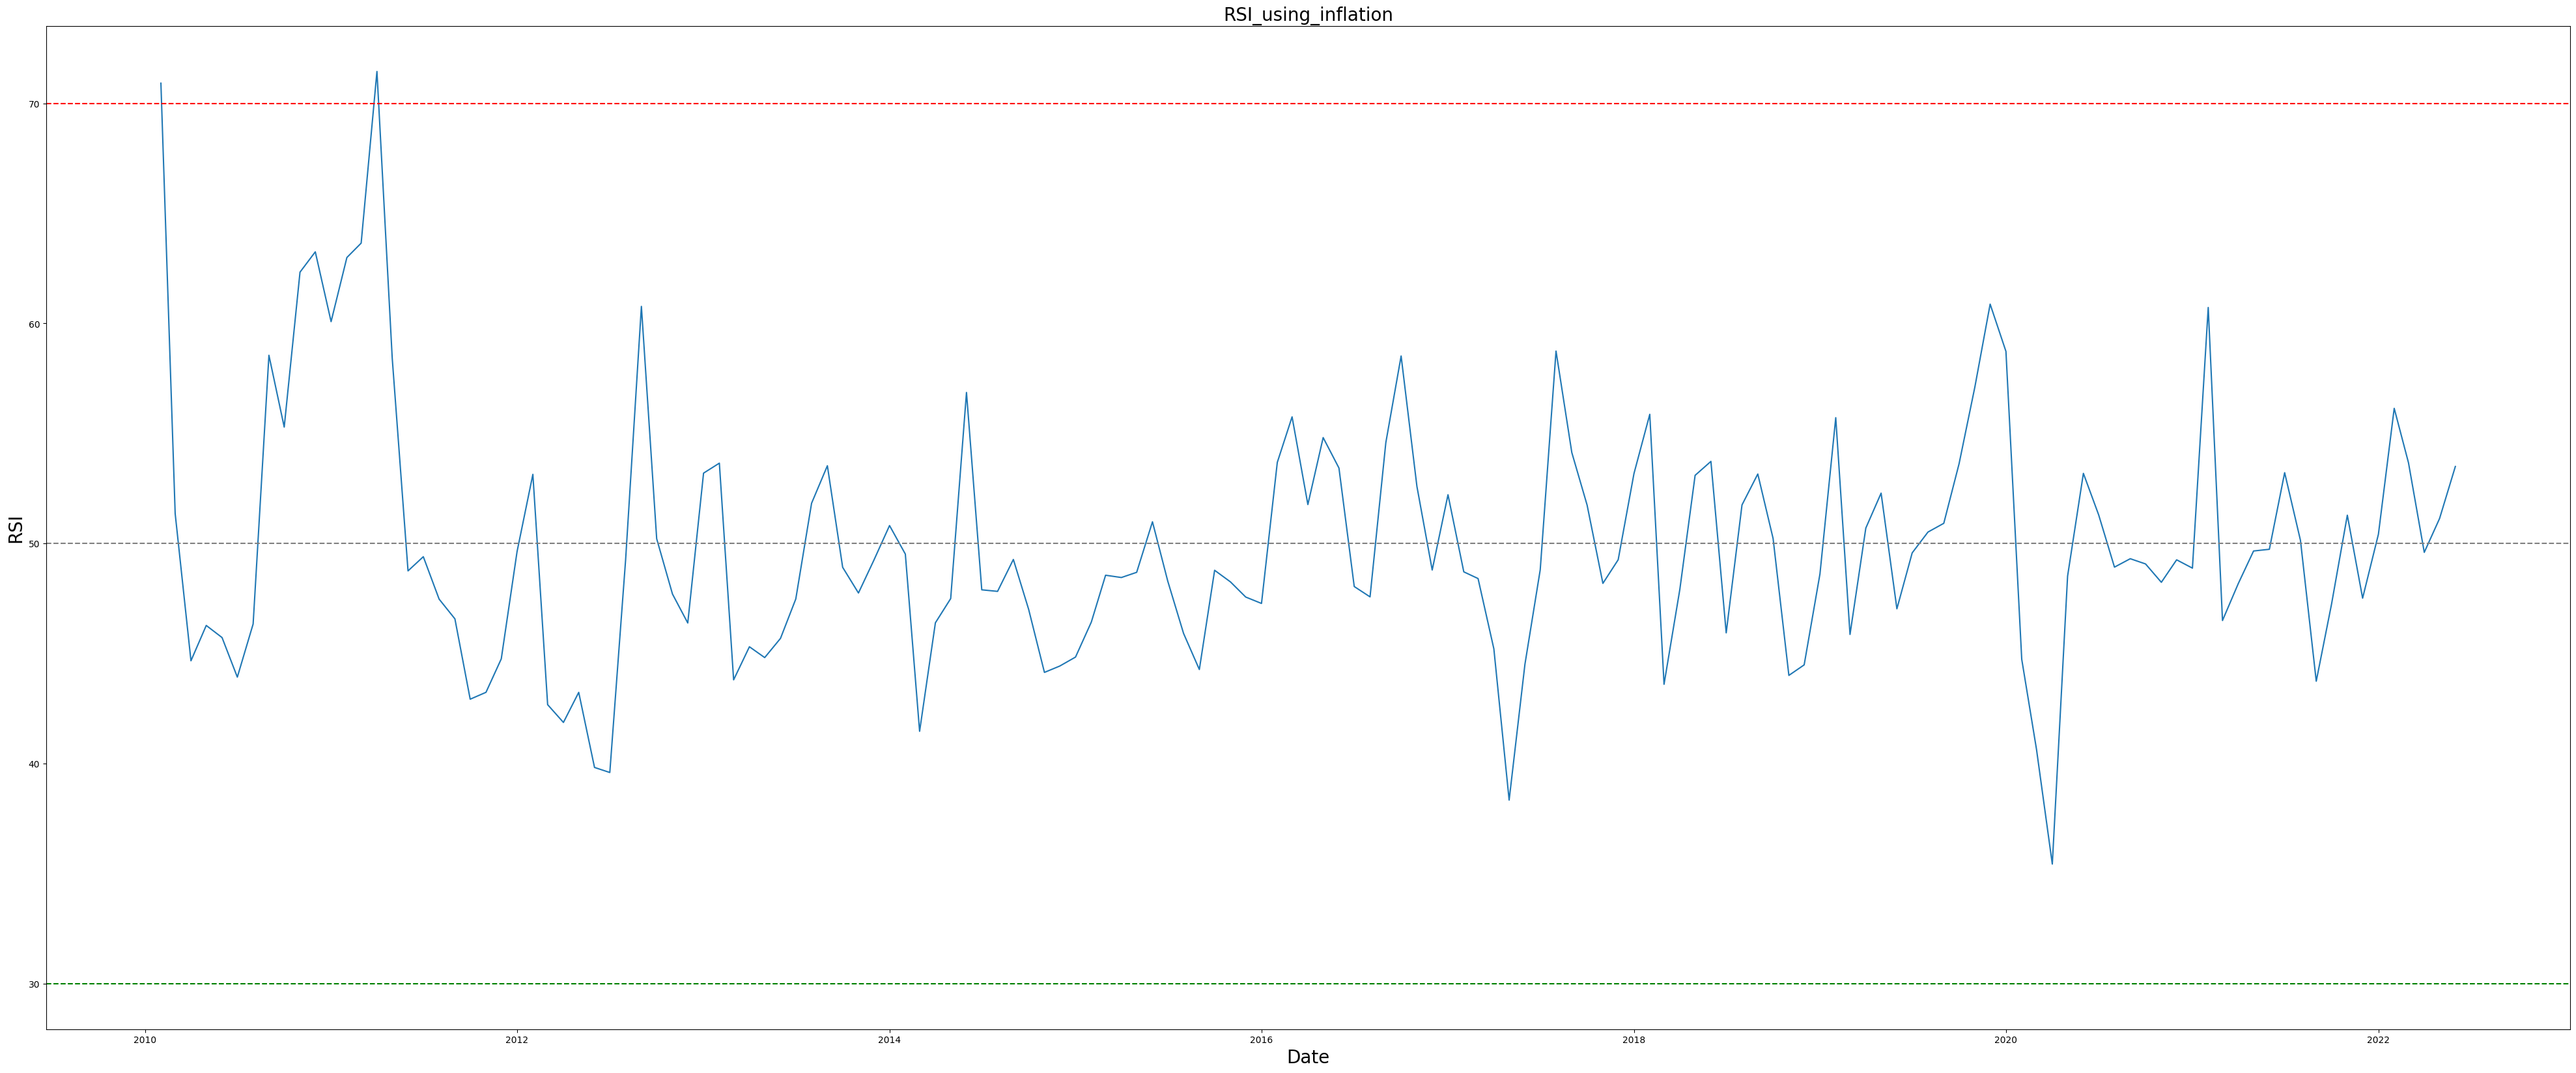

In [30]:

fig = plt.figure(figsize=(50, 20))
plt.plot(df_inflation['Date_inf'], df_inflation['RSI_in'])
# add labels and a title
plt.axhline(y=30, color='g', linestyle='--')
plt.axhline(y=50, color='gray', linestyle='--')
plt.axhline(y=70, color='r', linestyle='--')
plt.xlabel('Date',  fontsize=20)
plt.ylabel('RSI',  fontsize=20)
plt.title('RSI_using_inflation',  fontsize=20)

# Inflation is monthly and when it crosses 50 line => how to indentify the exact date? 

In [31]:
df_stock_price

,Date,StockPrice,Trading days,RSI_sp
0,2009-01-02,313.34,1,NaN
1,2009-01-05,311.91,2,NaN
2,2009-01-06,314.04,3,NaN
3,2009-01-07,319.58,4,NaN
4,2009-01-08,314.15,5,NaN
...,...,...,...,...
3361,2022-06-24,1185.48,3362,35.370958
3362,2022-06-27,1202.82,3363,40.420868
3363,2022-06-28,1218.10,3364,44.533727
3364,2022-06-29,1218.09,3365,44.531560


# NOTE: convert monthly data to daily data: interpolation or normalization


# Convert Monthly Inflation data to daily data using linear interpolation

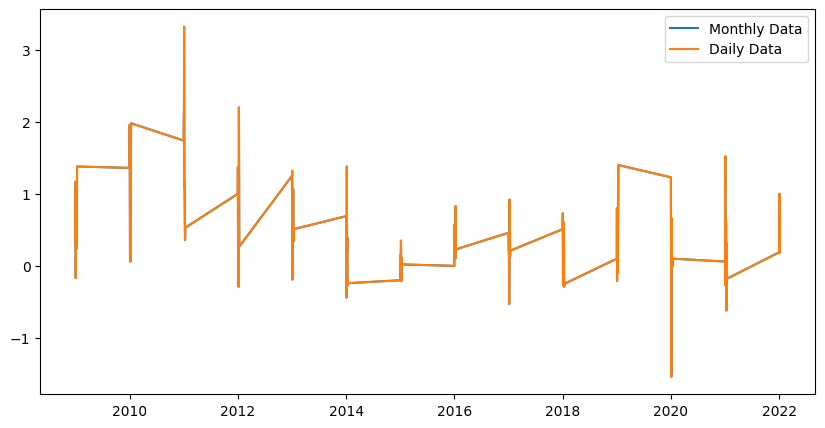

In [32]:
# Load monthly data into a pandas DataFrame
monthly_data = pd.read_csv('/Users/alvin/Desktop/desktop/NCKUxCUB/Thesis/Data/inflation data.csv')

# Convert the 'Date_inf' column to a datetime object
monthly_data['Date_inf'] = pd.to_datetime(monthly_data['Date_inf'])

# Set the 'Date_inf' column as the DataFrame's index
monthly_data.set_index('Date_inf', inplace=True, drop=False)

# Create a daily datetime index for the new DataFrame
daily_index = pd.date_range(start=monthly_data.index.min(), end=monthly_data.index.max(), freq='D')

# Create a new DataFrame with the daily index
daily_data = pd.DataFrame(index=daily_index)

# Resample the monthly data to daily using linear interpolation
daily_data['Inflation_variation'] = monthly_data['Inflation_variation'].resample('D').interpolate(method='linear')

# Plot the monthly and daily data
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(monthly_data.index, monthly_data['Inflation_variation'], label='Monthly Data')
ax.plot(daily_data.index, daily_data['Inflation_variation'], label='Daily Data')
ax.legend()
plt.show()


In [33]:
#containt growth rate
daily_data['Inflation_variation']

2009-01-01    0.32
2009-01-02    1.17
2009-01-03   -0.17
2009-01-04    0.35
2009-01-05    0.44
              ... 
2022-01-02    1.00
2022-01-03    0.70
2022-01-04    0.18
2022-01-05    0.38
2022-01-06    0.69
Freq: D, Name: Inflation_variation, Length: 4754, dtype: float64

In [34]:
daily_data

,Inflation_variation
2009-01-01,0.32
2009-01-02,1.17
2009-01-03,-0.17
2009-01-04,0.35
2009-01-05,0.44
...,...
2022-01-02,1.00
2022-01-03,0.70
2022-01-04,0.18
2022-01-05,0.38


In [35]:
#name the index column in dataframe "daily_date"
daily_data.index.name = 'Date_inf'

In [36]:
# calculate the RSI using ta library
daily_data['RSI_in'] = ta.momentum.RSIIndicator(daily_data['Inflation_variation'], window=14).rsi()

# print the RSI values
print(daily_data['RSI_in'])

Date_inf
2009-01-01           NaN
2009-01-02           NaN
2009-01-03           NaN
2009-01-04           NaN
2009-01-05           NaN
                 ...    
2022-01-02    100.000000
2022-01-03     71.824634
2022-01-04     47.069102
2022-01-05     53.681576
2022-01-06     61.673787
Freq: D, Name: RSI_in, Length: 4754, dtype: float64


Text(0.5, 1.0, 'RSI_using_inflation')

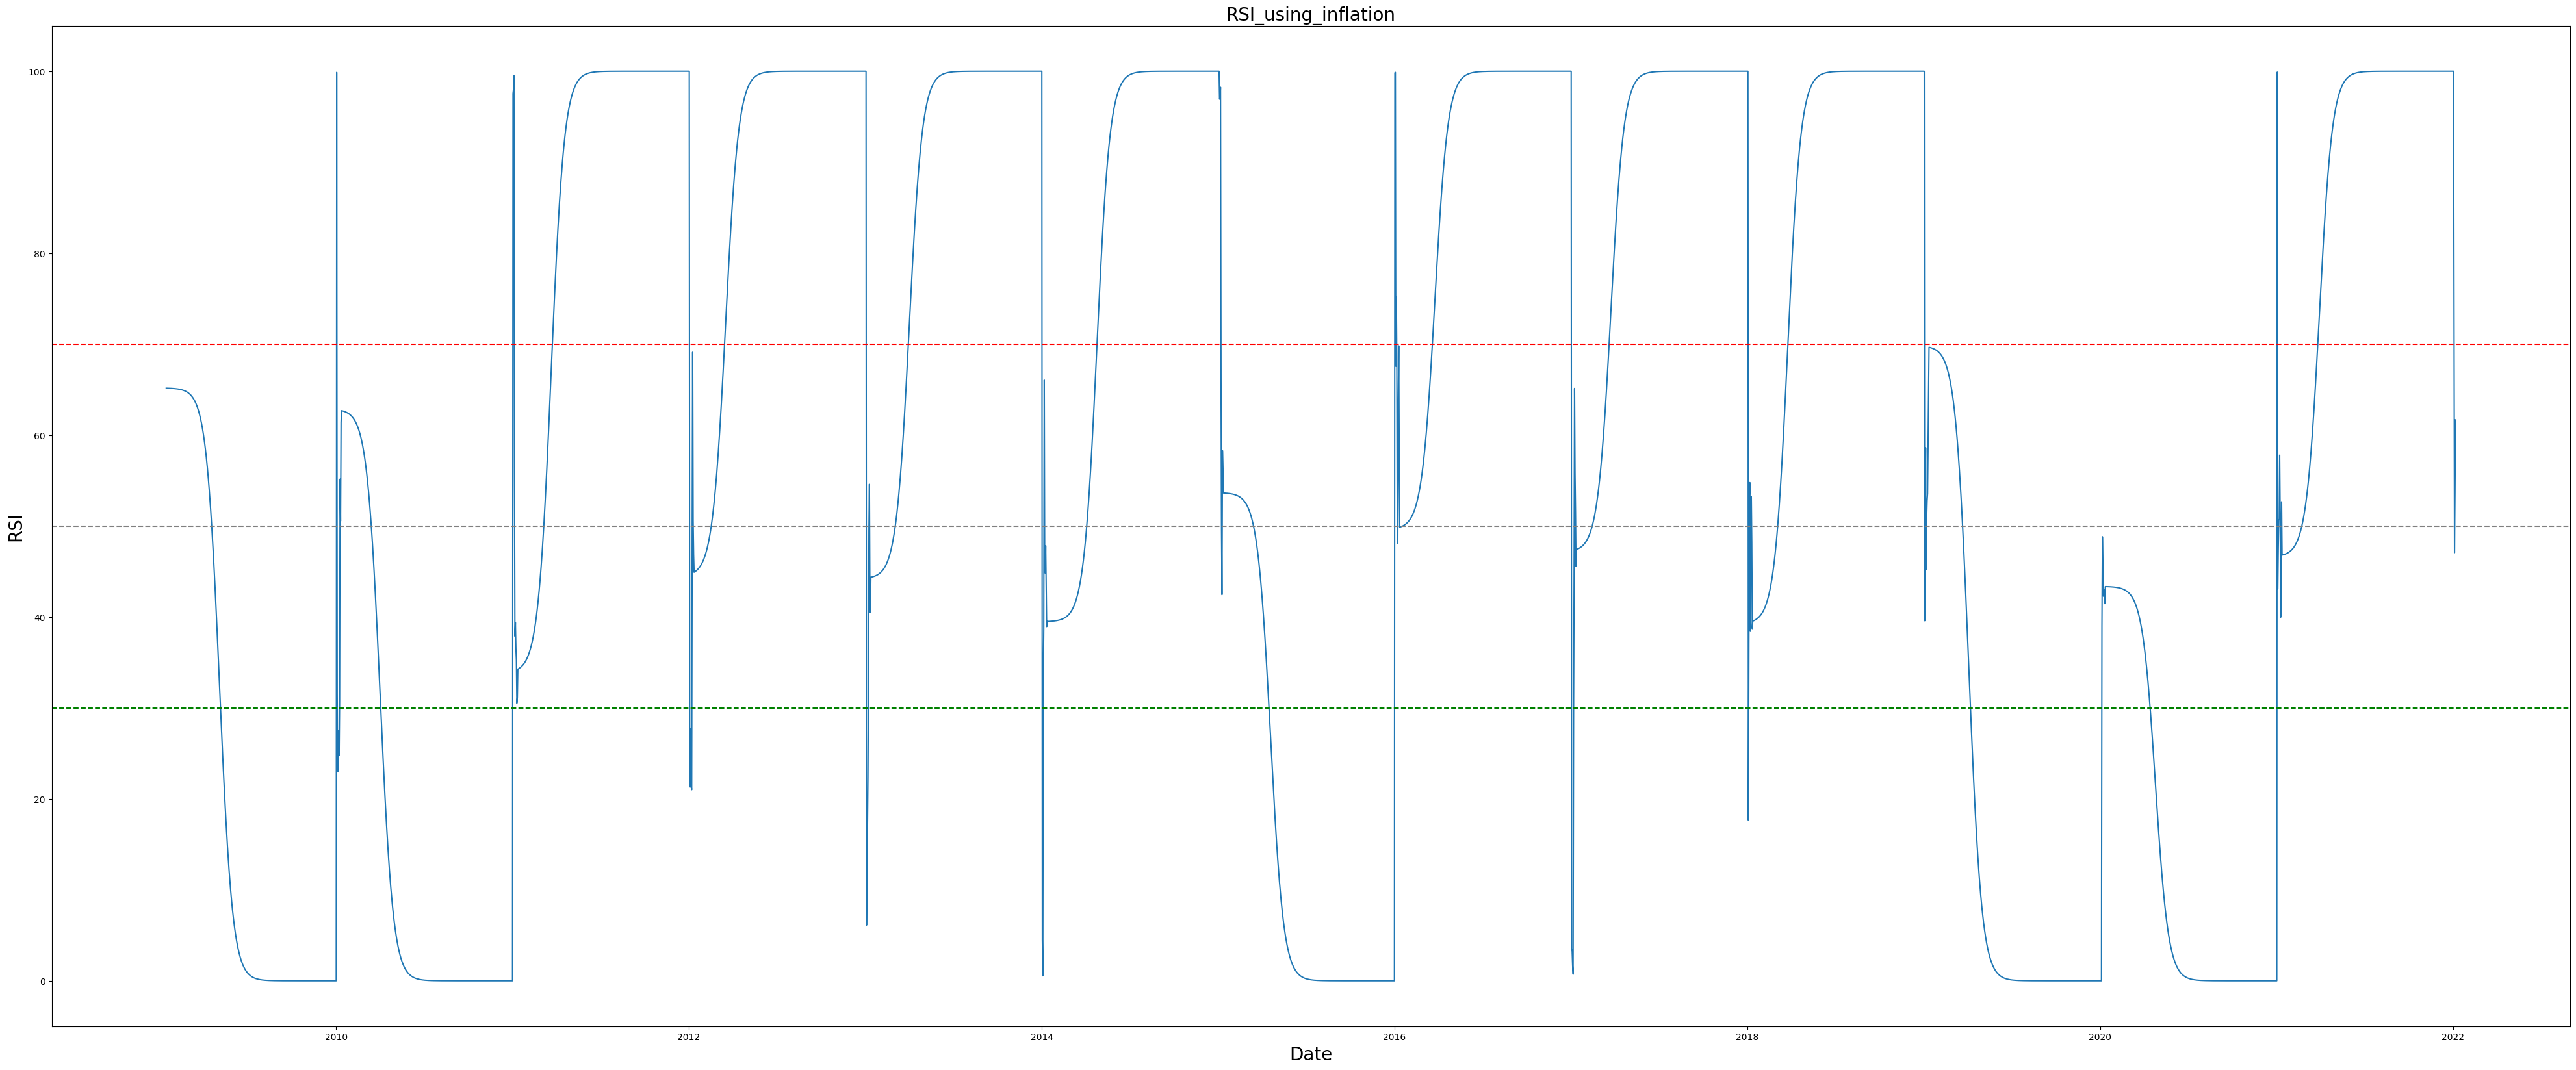

In [37]:
#plot RSI using daily inflation
fig = plt.figure(figsize=(50, 20))
plt.plot(daily_data.index, daily_data['RSI_in'])
# add labels and a title
plt.axhline(y=30, color='g', linestyle='--')
plt.axhline(y=50, color='gray', linestyle='--')
plt.axhline(y=70, color='r', linestyle='--')
plt.xlabel('Date',  fontsize=20)
plt.ylabel('RSI',  fontsize=20)
plt.title('RSI_using_inflation',  fontsize=20)

In [38]:
daily_data

,Inflation_variation,RSI_in
Date_inf,,
2009-01-01,0.32,NaN
2009-01-02,1.17,NaN
2009-01-03,-0.17,NaN
2009-01-04,0.35,NaN
2009-01-05,0.44,NaN
...,...,...
2022-01-02,1.00,100.000000
2022-01-03,0.70,71.824634
2022-01-04,0.18,47.069102


# Join two table "df_stock_price" and "daily_data"

Use left join to join two tables (df_stock_price and daily_date), df_stock_price will be the left side because some days are no trading (final database will conclude trading date)

In [39]:
df = pd.merge(df_stock_price, daily_data, left_on='Date', right_on='Date_inf', how='left')

In [40]:
df

,Date,StockPrice,Trading days,RSI_sp,Inflation_variation,RSI_in
0,2009-01-02,313.34,1,NaN,1.17,NaN
1,2009-01-05,311.91,2,NaN,0.44,NaN
2,2009-01-06,314.04,3,NaN,0.55,NaN
3,2009-01-07,319.58,4,NaN,0.52,NaN
4,2009-01-08,314.15,5,NaN,0.24,NaN
...,...,...,...,...,...,...
3361,2022-06-24,1185.48,3362,35.370958,NaN,NaN
3362,2022-06-27,1202.82,3363,40.420868,NaN,NaN
3363,2022-06-28,1218.10,3364,44.533727,NaN,NaN
3364,2022-06-29,1218.09,3365,44.531560,NaN,NaN


# Buy and Sell signal

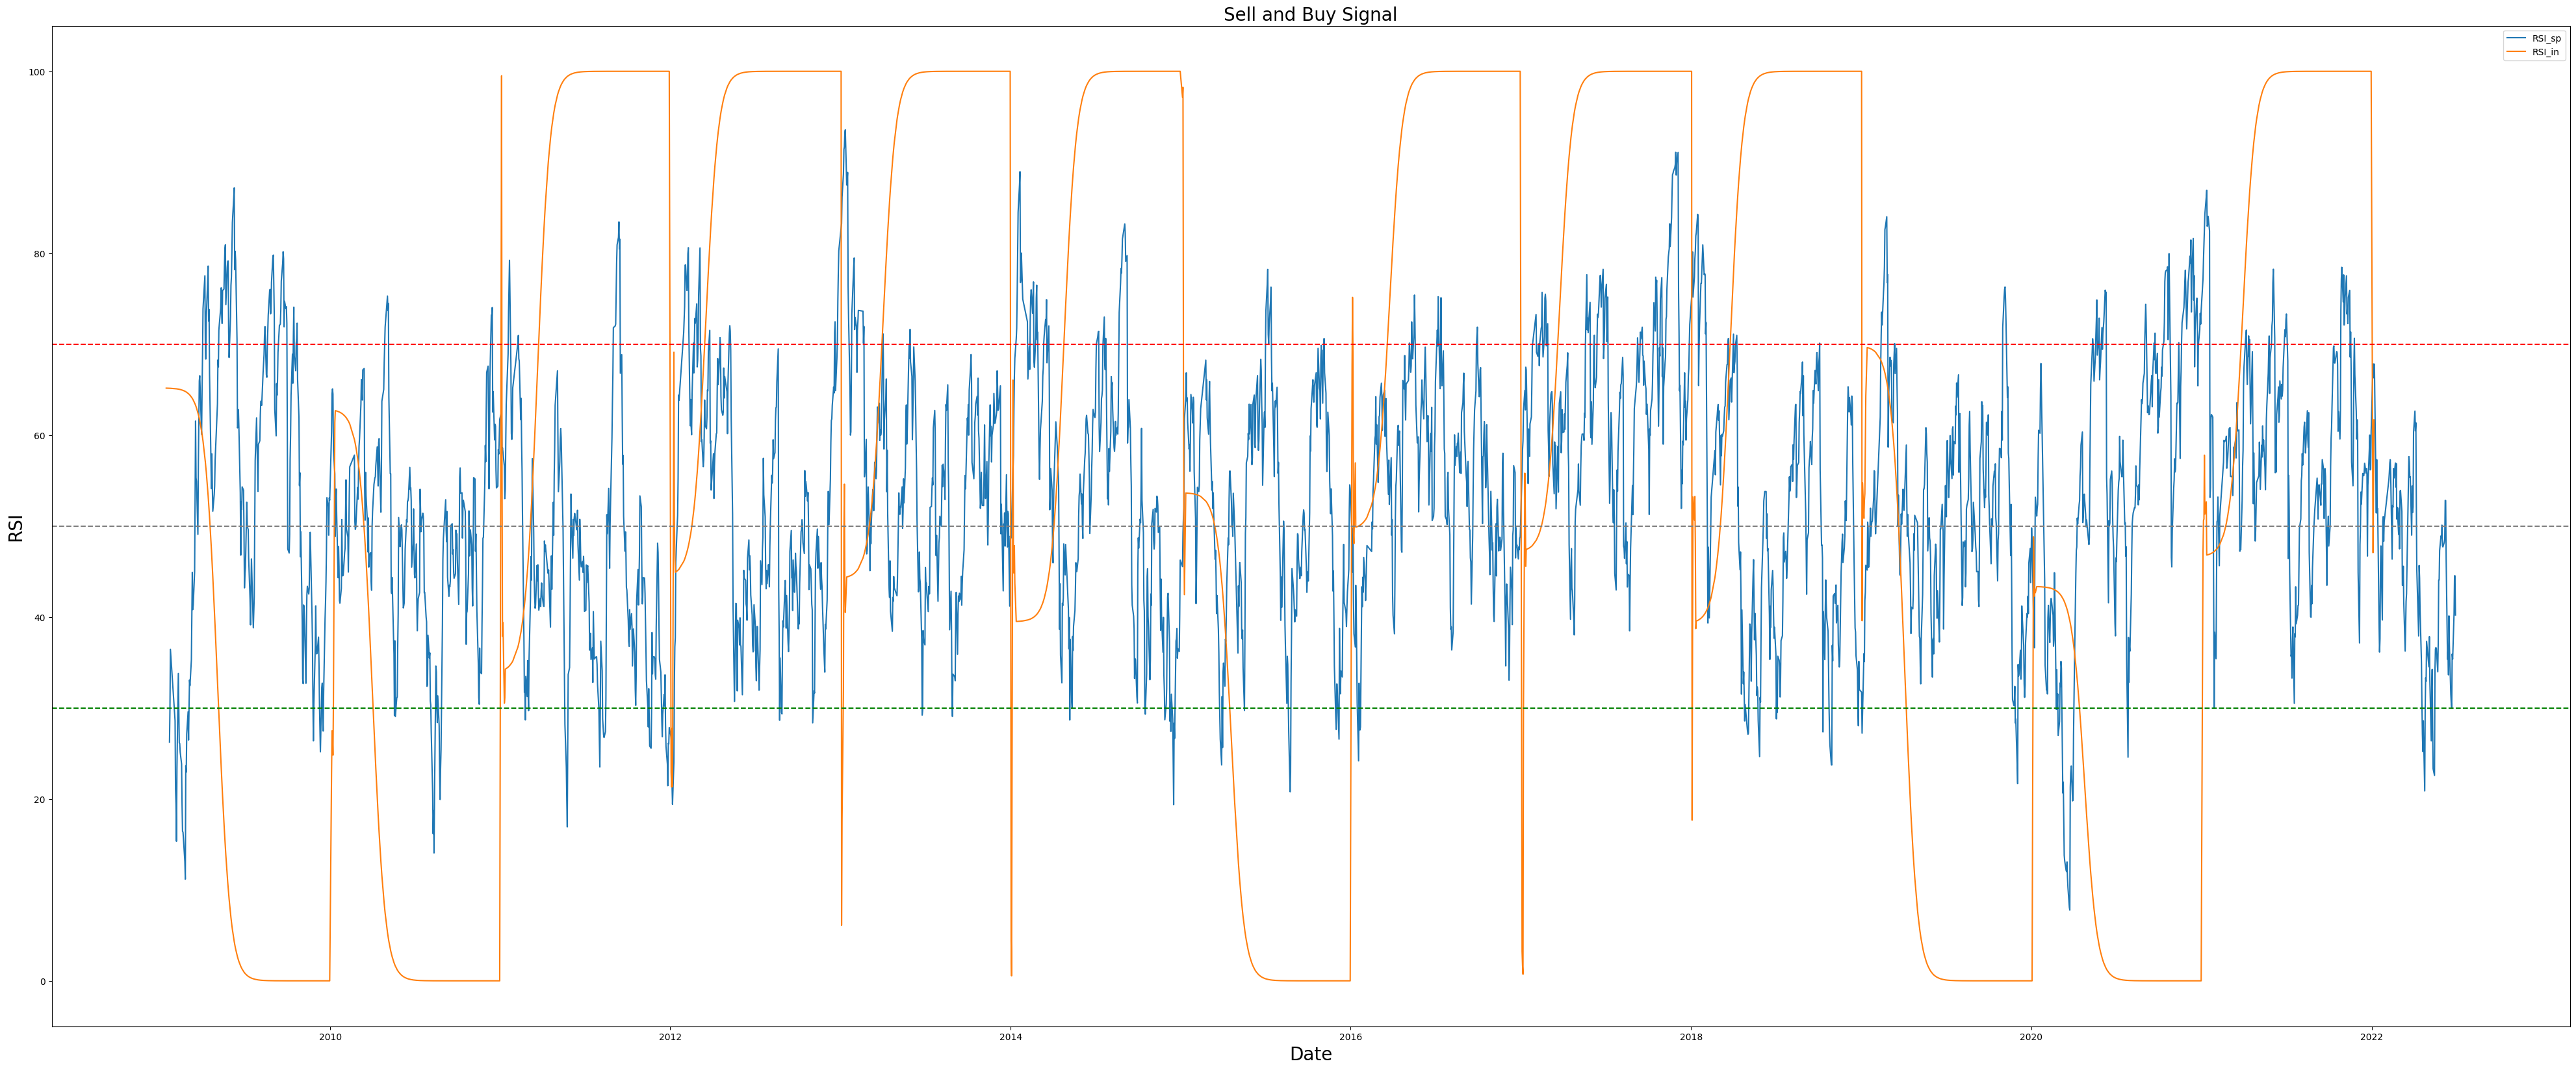

In [42]:
fig = plt.figure(figsize=(50, 20))
plt.plot(df['Date'], df['RSI_sp'], label='RSI_sp')
plt.plot(df['Date'], df['RSI_in'], label='RSI_in')
plt.axhline(y=30, color='g', linestyle='--')
plt.axhline(y=50, color='gray', linestyle='--')
plt.axhline(y=70, color='r', linestyle='--')
# Adding labels and title
plt.xlabel('Date', fontsize=20)
plt.ylabel('RSI', fontsize=20)
plt.title('Sell and Buy Signal', fontsize=20)

# Adding a legend
plt.legend()

# Displaying the chart
plt.show()

Rule 1: RSI_inflation crosses line 50 from below => BUY, RSI_inflation crosses line 50 from above => SELL

In [43]:
df['buy_signal_rule_1'] = (df['RSI_in'] > 50) & (df['RSI_in'].shift(1) < 50)
df['sell_signal_rule_1'] = (df['RSI_in'] < 50) & (df['RSI_in'].shift(1) > 50) 


Rule 2: RSI_inflation crosses line 30 from below => BUY, RSI_inflation crosses line 70 from above => SELL

In [44]:
df['buy_signal_rule_2'] = (df['RSI_in'] > 30) & (df['RSI_in'].shift(1) < 30)
df['sell_signal_rule_2'] = (df['RSI_in'] < 70) & (df['RSI_in'].shift(1) > 70) 

Rule 3: RSI_stock price and RSI_inflation cross line 50 from below => BUY, RSI_stock price and RSI_inflation cross line 50 from above => SELL

In [45]:
df['buy_signal_rule_3'] = (df['RSI_in'] > 50) & (df['RSI_in'].shift(1) < 50) & (df['RSI_sp'] > 50) & (df['RSI_sp'].shift(1) < 50) 
df['sell_signal_rule_3'] = (df['RSI_in'] < 50) & (df['RSI_in'].shift(1) > 50) & (df['RSI_sp'] < 50) & (df['RSI_sp'].shift(1) > 50) 

In [46]:
#rule 5
df['buy_signal_rule_5'] = (df['RSI_in'] > 30) & (df['RSI_in'].shift(1) < 30) & (df['RSI_sp'] > 30) & (df['RSI_sp'].shift(1) < 30) 
df['sell_signal_rule_5'] = (df['RSI_in'] < 70) & (df['RSI_in'].shift(1) > 70) & (df['RSI_sp'] < 70) & (df['RSI_sp'].shift(1) > 70) 

Rule 0: RSI_stock price crosses line 30 from below => BUY, RSI_stock price crosses line 70 from above => SELL (the most popular RSI)

In [47]:
df['buy_signal_rule_0'] = (df['RSI_sp'] > 30) & (df['RSI_sp'].shift(1) < 30)
df['sell_signal_rule_0'] = (df['RSI_sp'] < 70) & (df['RSI_sp'].shift(1) > 70) 

In [48]:
df

,Date,StockPrice,Trading days,RSI_sp,Inflation_variation,RSI_in,buy_signal_rule_1,sell_signal_rule_1,buy_signal_rule_2,sell_signal_rule_2,buy_signal_rule_3,sell_signal_rule_3,buy_signal_rule_5,sell_signal_rule_5,buy_signal_rule_0,sell_signal_rule_0
0,2009-01-02,313.34,1,NaN,1.17,NaN,False,False,False,False,False,False,False,False,False,False
1,2009-01-05,311.91,2,NaN,0.44,NaN,False,False,False,False,False,False,False,False,False,False
2,2009-01-06,314.04,3,NaN,0.55,NaN,False,False,False,False,False,False,False,False,False,False
3,2009-01-07,319.58,4,NaN,0.52,NaN,False,False,False,False,False,False,False,False,False,False
4,2009-01-08,314.15,5,NaN,0.24,NaN,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361,2022-06-24,1185.48,3362,35.370958,NaN,NaN,False,False,False,False,False,False,False,False,False,False
3362,2022-06-27,1202.82,3363,40.420868,NaN,NaN,False,False,False,False,False,False,False,False,False,False
3363,2022-06-28,1218.10,3364,44.533727,NaN,NaN,False,False,False,False,False,False,False,False,False,False
3364,2022-06-29,1218.09,3365,44.531560,NaN,NaN,False,False,False,False,False,False,False,False,False,False


count how many buy signal and sell signal in each rules

In [49]:

#rule 1
rule_1_buy_amt = df['buy_signal_rule_1'].value_counts()
print(rule_1_buy_amt)
rule_1_sell_amt = df['sell_signal_rule_1'].value_counts()
print(rule_1_sell_amt)

buy_signal_rule_1
False    3345
True       21
Name: count, dtype: int64
sell_signal_rule_1
False    3345
True       21
Name: count, dtype: int64


In [50]:
#rule 2
rule_2_buy_amt = df['buy_signal_rule_2'].value_counts()
print(rule_2_buy_amt)
rule_2_sell_amt = df['sell_signal_rule_2'].value_counts()
print(rule_2_sell_amt)

buy_signal_rule_2
False    3356
True       10
Name: count, dtype: int64
sell_signal_rule_2
False    3356
True       10
Name: count, dtype: int64


In [51]:

#rule 3
rule_3_buy_amt = df['buy_signal_rule_3'].value_counts()
print(rule_3_buy_amt)
rule_3_sell_amt = df['sell_signal_rule_3'].value_counts()
print(rule_3_sell_amt)

buy_signal_rule_3
False    3366
Name: count, dtype: int64
sell_signal_rule_3
False    3364
True        2
Name: count, dtype: int64


In [52]:
# RSI price past, inflation is still the same
#rule 5
rule_5_buy_amt = df['buy_signal_rule_5'].value_counts()
print(rule_5_buy_amt)
rule_5_sell_amt = df['sell_signal_rule_5'].value_counts()
print(rule_5_sell_amt)

buy_signal_rule_5
False    3366
Name: count, dtype: int64
sell_signal_rule_5
False    3366
Name: count, dtype: int64


In [53]:
#rule 0
rule_0_buy_amt = df['buy_signal_rule_0'].value_counts()
print(rule_0_buy_amt)
rule_0_sell_amt = df['sell_signal_rule_0'].value_counts()
print(rule_0_sell_amt)

buy_signal_rule_0
False    3309
True       57
Name: count, dtype: int64
sell_signal_rule_0
False    3276
True       90
Name: count, dtype: int64


# Calculate profit of each rule

Rule 1